# Project Description and Goals
The Codeup Data Science Team wants to understand why customers at Telco, a telecommunications company, are churning. The churn rate, also known as the rate of attrition or customer churn, is the rate at which customers stop doing business with an entity.
### Objectives for this project include: 
- Identifying the features to understand why customers are leaving the company.
- Finding the drivers for customer churn.
- Documenting process and analysis throughout the data science pipeline.
- Constructing a Machine Learning classification model that predicts future customer churn as accurately as possible.
- Deliverables:
    - [README.md](https://github.com/aliciag92/classification-project) file containing overall project information.
    - Jupyter Notebook Report detailing the process to create model and predictions.
    - Individual modules for [data acquisition](https://github.com/aliciag92/classification-project/blob/main/acquire.py) and [data preparation](https://github.com/aliciag92/classification-project/blob/main/prepare.py) that house functions to acquire and prepare data.
    - Final [CSV file](https://github.com/aliciag92/classification-project/blob/main/predictions.csv) with customer_id, probability of churn, and prediction of churn.
    - Notebook walkthrough

### Pipeline Process:
1. Acquire
2. Prepare
3. Explore
4. Model/Evaluate
5. Deliver

### Initial hypotheses
- Are senior citizens more likely to churn than non-senior citizens?
- Is there a difference in the rate of churn for customers who have streaming services vs customers who do not?
- Does contract type play a role in churn rate?
- Do customers with add-on's churn more that customers without any add-on's?

### Project Imports

In [1]:
import numpy as np 
import pandas as pd

# visualize
import matplotlib.pyplot as plt
import seaborn as sns 
import graphviz
from graphviz import Graph

# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")

# .py modules to acquire and prep the data
import acquire
import prepare

# hypothesis tests for data exploration
from scipy.stats import chi2_contingency
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind

# train, validate, test
from sklearn.model_selection import train_test_split

# evaluating models
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support 

# creating models for classification ML:
# Decision Tree  
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

# Random Forest
from sklearn.ensemble import RandomForestClassifier

# K-Nearest Neighbor(KNN)  
from sklearn.neighbors import KNeighborsClassifier

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Data Acquisition

### Initial Data Summarization

In [3]:
# get the dataframe using our acquire.py script:
df = acquire.get_telco_data()

df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
1,4,1,1,0013-MHZWF,Female,0,No,Yes,9,Yes,...,Yes,Yes,Yes,Yes,69.4,571.45,No,Month-to-month,DSL,Credit card (automatic)
2,1,1,1,0015-UOCOJ,Female,1,No,No,7,Yes,...,No,No,No,Yes,48.2,340.35,No,Month-to-month,DSL,Electronic check
3,1,1,1,0023-HGHWL,Male,1,No,No,1,No,...,No,No,No,Yes,25.1,25.1,Yes,Month-to-month,DSL,Electronic check
4,3,1,1,0032-PGELS,Female,0,Yes,Yes,1,No,...,No,No,No,No,30.5,30.5,Yes,Month-to-month,DSL,Bank transfer (automatic)


In [4]:
#rows and columns
df.shape

(7043, 24)

In [5]:
#list of column names and data types with more information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [6]:
#columns with only object dtype
df.select_dtypes(include='object').columns.to_list()

['customer_id',
 'gender',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'total_charges',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type']

In [7]:
#columns with only numeric types
df.select_dtypes(include=['float64', 'int64']).columns.to_list()

['payment_type_id',
 'internet_service_type_id',
 'contract_type_id',
 'senior_citizen',
 'tenure',
 'monthly_charges']

In [8]:
#transposed summary statistics for each of the numeric variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
payment_type_id,7043.0,2.315633,1.148907,1.00,1.0,2.00,3.00,4.00
internet_service_type_id,7043.0,1.872923,0.737796,1.00,1.0,2.00,2.00,3.00
contract_type_id,7043.0,1.690473,0.833755,1.00,1.0,1.00,2.00,3.00
senior_citizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
monthly_charges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [9]:
# getting value counts for each column
for column in df.columns:
    print(column.upper())
    print(df[column].value_counts())
    print("-------------------------------------")

PAYMENT_TYPE_ID
1    2365
2    1612
3    1544
4    1522
Name: payment_type_id, dtype: int64
-------------------------------------
INTERNET_SERVICE_TYPE_ID
2    3096
1    2421
3    1526
Name: internet_service_type_id, dtype: int64
-------------------------------------
CONTRACT_TYPE_ID
1    3875
3    1695
2    1473
Name: contract_type_id, dtype: int64
-------------------------------------
CUSTOMER_ID
1850-AKQEP    1
8741-LQOBK    1
1991-VOPLL    1
7481-ATQQS    1
3097-FQTVJ    1
             ..
4301-VVZKA    1
0572-ZJKLT    1
2568-OIADY    1
6484-LATFU    1
4291-SHSBH    1
Name: customer_id, Length: 7043, dtype: int64
-------------------------------------
GENDER
Male      3555
Female    3488
Name: gender, dtype: int64
-------------------------------------
SENIOR_CITIZEN
0    5901
1    1142
Name: senior_citizen, dtype: int64
-------------------------------------
PARTNER
No     3641
Yes    3402
Name: partner, dtype: int64
-------------------------------------
DEPENDENTS
No     4933
Yes    

In [10]:
#checking total charges (.value_counts() shows 11 missing)
print("Total Charges:")
print("--------------")
print(df.total_charges.sort_values().head(12))

Total Charges:
--------------
2048         
6143         
1949         
1878         
6615         
6686         
6895         
6605         
6569         
2029         
2132         
761     100.2
Name: total_charges, dtype: object


### Initial plots for inidivual variables


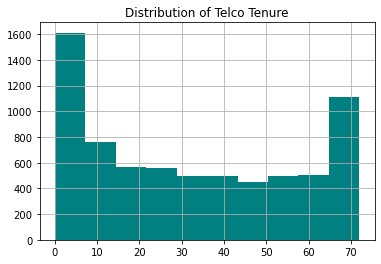

In [11]:
df['tenure'].hist(color='teal')

plt.title('Distribution of Telco Tenure')
plt.show()

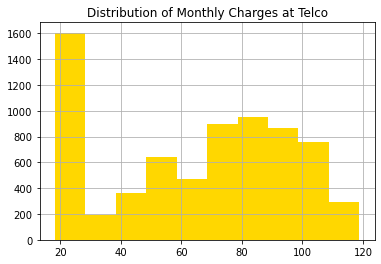

In [12]:
df['monthly_charges'].hist(color='gold')

plt.title('Distribution of Monthly Charges at Telco')
plt.show()

### Findings
- Most columns that are strings/objects need to be converted to numerical variables for data exploration and modeling
- Some columns have "yes/no/no ___ service" variables which can be reduced to only "yes/no"
- Value counts on total charges show 11 blank (new customers who haven't made first payment?)
- Value counts on tenure show 11 with "0" value (yes, they are new customers)
- Tenure is showing it is the highest at the start of service within the first year.
- Many customers pay around $20-30 monthly

# Data Preparation

In [13]:
#take a peek at data to see columns in form of a list
df.head(1).T

,0
payment_type_id,2
internet_service_type_id,1
contract_type_id,1
customer_id,0003-MKNFE
gender,Male
senior_citizen,0
partner,No
dependents,No
tenure,9
phone_service,Yes


### Initial clean up
- Setup the index
- Adjust column names

In [14]:
#set customer_id as first column
df = df.set_index('customer_id')

In [15]:
#shorter column names for readability: 
df = df.rename(columns={"payment_type_id": "payment_type", 
                        "internet_service_type_id": "internet_type",
                        "contract_type_id": "contract",
                        "senior_citizen": "senior", 
                        "phone_service": "phone", 
                        #set up payment_type column for encoding:
                        "payment_type": "auto_pay"})

### Encode columns with "yes"/"no"/"no ____ service" variables and make sure the new variables are numeric
- `partner`
- `dependents`
- `phone_service`
- `paperless_billing`
- `churn`





- `multiple_lines` (*note*: "no phone service" = no)
- `online_security` (*note*: "no internet service" = no)
- `online_backup` (*note*: "no internet service" = no)
- `device_protection` (*note*: "no internet service" = no)
- `tech_support` (*note*: "no internet service" = no)
- `streaming_tv` (*note*: "no internet service" = no)
- `streaming_movies` (*note*: "no internet service" = no)

In [16]:
#yes/no columns only
df.partner = df.partner.map({'No': 0, 'Yes': 1})
df.dependents = df.dependents.map({'No': 0, 'Yes': 1})
df.phone = df.phone.map({'No': 0, 'Yes': 1})
df.paperless_billing = df.paperless_billing.map({'No': 0, 'Yes': 1})
df.churn = df.churn.map({'No': 0, 'Yes': 1})


#yes/no/no___ columns (replace "no ___ service" with "no" before encoding)
df.multiple_lines = df.multiple_lines.replace('No phone service', 'No')
df.multiple_lines = df.multiple_lines.map({'No': 0, 'Yes': 1})

df.online_security = df.online_security.replace('No internet service', 'No')
df.online_security = df.online_security.map({'No': 0, 'Yes': 1})

df.online_backup = df.online_backup.replace('No internet service', 'No')
df.online_backup = df.online_backup.map({'No': 0, 'Yes': 1})

df.device_protection = df.device_protection.replace('No internet service', 'No')
df.device_protection = df.device_protection.map({'No': 0, 'Yes': 1})

df.tech_support = df.tech_support.replace('No internet service', 'No')
df.tech_support = df.tech_support.map({'No': 0, 'Yes': 1})

df.streaming_tv = df.streaming_tv.replace('No internet service', 'No')
df.streaming_tv = df.streaming_tv.map({'No': 0, 'Yes': 1})

df.streaming_movies = df.streaming_movies.replace('No internet service', 'No')
df.streaming_movies = df.streaming_movies.map({'No': 0, 'Yes': 1})

### Fill in missing values
- `total_charges`

In [17]:
#`fillna` to fill missing numbers
df = df.fillna(0)

In [18]:
#from initial summarization, we know 11 customers w/ no total charges
# so replace blank spaces w/ '0' and convert the col to float
df.total_charges = df.total_charges.str.replace(' ', '0').astype(float)

In [19]:
#check if `total_charges` is now a float
df.total_charges.dtypes

dtype('float64')

### Create dummy variables
- `gender`

In [20]:
#make a dataframe out of the gender column, drop_first to remove redundancy
dummies = pd.get_dummies(df[['gender']], drop_first=True)

In [21]:
#peek to establish that we got what we wanted
dummies.head()

,gender_Male
customer_id,
0003-MKNFE,1
0013-MHZWF,0
0015-UOCOJ,0
0023-HGHWL,1
0032-PGELS,0


In [22]:
#rename column to lower_case "male"
dummies.rename(columns={'gender_Male': 'gender_male'}, inplace=True)

In [23]:
#add new columns to original dataframe
df = pd.concat([df,dummies], axis=1)

### Adjust columns' variables to make more sense and make sure they are numeric
Currently:
- `contract_type`
    - 1=Month-to-month
    - 2=One year
    - 3=Two year
    
    
    
- `internet_type` 
    - 1=DSL
    - 2=Fiber optic
    - 3=None
    
    
    
- `payment_type` --> `auto_pay`
    - 1=Electronic check
    - 2=Mailed check
    - 3=Bank transfer(automatic)
    - 4=Credit card(automatic)

In [24]:
#adjust the new values for `contract_type` to be: 
    #0 = Month-to-Month
    #1 = One year
    #2 = Two Year
    
df.contract_type = df.contract_type.replace({'Month-to-month': 0, 
                                             'One year': 1, 
                                             'Two year': 2})

In [25]:
#adjust the new values for `internet_service_type` to be: 
    #0 = None
    #1 = DSL
    #2 = Fiber optic
df.internet_service_type = df.internet_service_type.replace({'None': 0, 
                                                             'DSL': 1, 
                                                             'Fiber optic': 2})


In [26]:
#adjust payment_type column to auto_pay and adjust the new values to be: 
    #0 = Electronic check and Mailed check
    #1 = Bank transfer (automatic) and Credit card (automatic)

df.auto_pay = df.auto_pay.replace({'Electronic check': 0, 
                                   'Mailed check': 0, 
                                   'Bank transfer (automatic)': 1, 
                                   'Credit card (automatic)': 1})

### Create new features 
- `streaming_tv` and `streaming_movies` --> streaming_services
- `online_security`, `online_backup`, `device_protection`, `tech_support` --> add_ons

In [27]:
#combine streaming_services
df['streaming_services'] = df['streaming_tv'] + df['streaming_movies']


#combine add-ons
df['add_ons'] = df['online_security'] + df['online_backup'] + df['device_protection'] + df['tech_support']

### Remove unnecessary columns
- `payment_type`: represented in `auto_pay` column
- `internet_type`: represented in `internet_service_type` column
- `contract`: represented in `contract_type` column
- `gender`: represented in `gender_male` column
- `streaming_tv` and `streaming_movies`: represented in `streaming_services` column
- `online_security`, `online_backup`, `device_protection`, `tech_support`: represented in `add_ons` column

In [28]:
df = df.drop(columns=['payment_type', 
                      'internet_type', 
                      'contract', 
                      'gender', 
                      'streaming_tv',
                      'streaming_movies',
                      'online_security',
                      'online_backup',
                      'device_protection',
                      'tech_support'])

### Test functions from prepare.py

In [29]:
#start from scratch with our original dataframe 
df = acquire.get_telco_data()
df.head(1)

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check


In [30]:
#grab cleaned data frame using the clean_telco function in prepare.py
df = prepare.clean_telco(df)
df.head()

,senior,partner,dependents,tenure,phone,multiple_lines,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,auto_pay,gender_male,streaming_services,add_ons
customer_id,,,,,,,,,,,,,,,,
0003-MKNFE,0,0,0,9,1,1,0,59.9,542.40,0,0,1,0,1,1,0
0013-MHZWF,0,0,1,9,1,0,1,69.4,571.45,0,0,1,1,0,2,1
0015-UOCOJ,1,0,0,7,1,0,1,48.2,340.35,0,0,1,0,0,0,1
0023-HGHWL,1,0,0,1,0,0,1,25.1,25.10,1,0,1,0,1,0,0
0032-PGELS,0,1,1,1,0,0,0,30.5,30.50,1,0,1,1,0,0,1


In [31]:
#dtypes are good to go
df.dtypes

senior                     int64
partner                    int64
dependents                 int64
tenure                     int64
phone                      int64
multiple_lines             int64
paperless_billing          int64
monthly_charges          float64
total_charges            float64
churn                      int64
contract_type              int64
internet_service_type      int64
auto_pay                   int64
gender_male                uint8
streaming_services         int64
add_ons                    int64
dtype: object

In [32]:
#split the data using the split function in prepare.py
train, validate, test = prepare.split(df, stratify_by="churn")

In [33]:
#check split datasets
print('overall shape of dataframe:', df.shape)
print('train:', train.shape)
print('validate:', validate.shape)
print('test:', test.shape)

#work w/ training data
train.head()

overall shape of dataframe: (7043, 16)
train: (3943, 16)
validate: (1691, 16)
test: (1409, 16)


,senior,partner,dependents,tenure,phone,multiple_lines,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,auto_pay,gender_male,streaming_services,add_ons
customer_id,,,,,,,,,,,,,,,,
2739-CCZMB,0,0,1,5,1,0,0,20.35,122.00,0,0,0,1,1,0,0
8035-PWSEV,0,0,0,6,1,0,1,89.25,487.05,0,0,2,0,0,1,2
6250-CGGUN,0,0,0,54,1,0,0,84.40,4484.05,0,1,2,0,1,0,3
9499-XPZXM,0,1,0,72,1,1,0,64.75,4804.75,0,2,1,1,0,0,3
2305-MRGLV,0,1,0,28,1,0,0,76.55,2065.40,0,0,2,1,1,0,1


### Findings
- Data is ready to be explored

# Data Exploration

Establish Categorical and Continuous Features
    
| **Categorical**         | **Continous**   |
|-------------------------|-----------------|
| senior                  | tenure          |
| partner                 | monthly_charges |
| dependents              | total_charges   |
| phone                   |        |
| multiple_lines          |        |
| paperless_billing       |        |
| churn (target variable) |        |
| contract_type           |        |
| internet_service_type   |        |
| auto_pay                |        |
| gender_male             |        |
| streaming_services      |        |
| add_ons                 |        |

### Explore the target (train data) and identify features related to churn by answering key questions

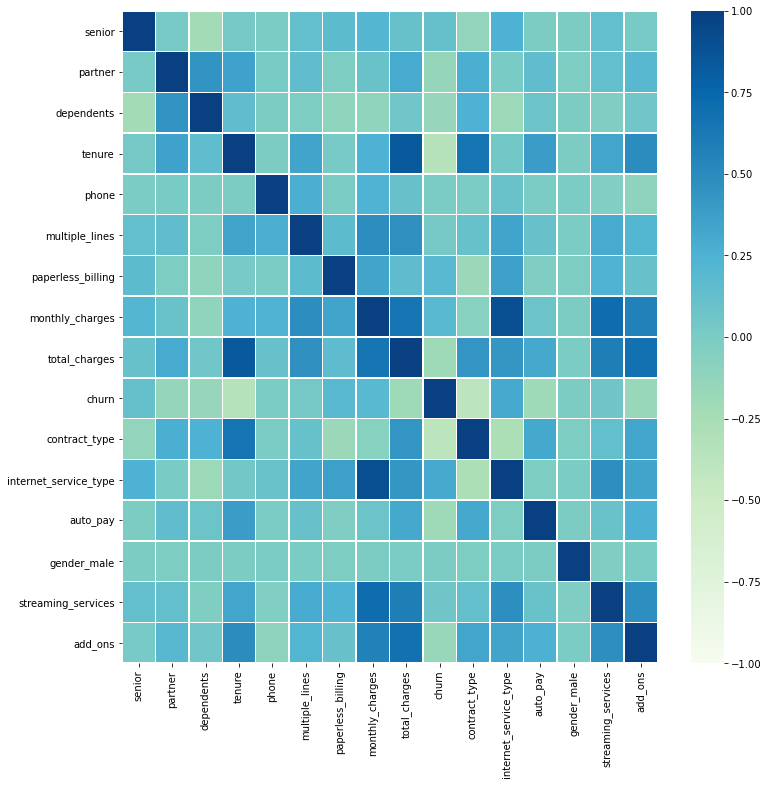

In [34]:
#visualize correlation of variables with heatmap
corr = train.corr()

plt.figure(figsize=(12,12)) #set up figure


sns.heatmap(corr,
            vmin=-1, #set min value for color scale at -1
            vmax=1, #set max value for color scale at 1
            center=0, #set center the color scale at 0
            cmap='GnBu', #change default color
            linewidths=.5) #space out each square

plt.show()

### Findings
- The darker/lighter the colors on heatmap, the more of a correlation
- Churn correlates more with:
    - tenure
    - contract_type
    - internet_service_type

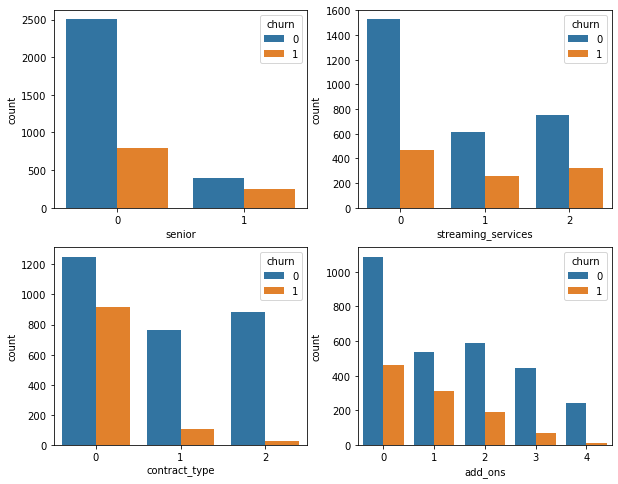

In [35]:
#create subplots to visualize initial hypotheses if a feature affects rate of churn
plt.figure(figsize=(10,8))

#Are senior citizens more likely to churn than non-senior citizens?
plt.subplot(221)
sns.countplot(data=train, x='senior', hue="churn")

#Is there a difference in the rate of churn for customers who have streaming services vs customers who do not?
plt.subplot(222)
sns.countplot(data=train, x='streaming_services', hue="churn")

#Does contract type play a role in churn rate?
plt.subplot(223)
sns.countplot(data=train, x='contract_type', hue="churn")

#Do customers with add-on's churn more that customers without any add-on's
plt.subplot(224)
sns.countplot(data=train, x='add_ons', hue="churn")

plt.show()

### Findings
- Non-seniors have a higher churn rate than seniors.
- Customers with no streaming services are more likely to churn.
- However, if streaming 1 service (tv OR movies) or 2 services (tv AND movies) are combined, would it be roughly the same churn rate as customers without any streaming services?
- Highest rate of churn = customers on a month-to-month contract and customers without add-ons.

### Statistical Tests
- Chi$^2$ ($\chi^2$) Test for Independence
    - The null hypothesis assumes that the observed frequencies for a categorical variable match the expected frequencies for the categorical variable
    - The test can be used to compare 2 categorical variables
    - Steps:
        - Form null and alternative hypothesis
        - Set alpha
        - Create crosstab to look at observed frequency (contingency table)
        - Get observed values
        - Calculate test-statistic

#### Is customer churn independent on contract type?

In [36]:
#Follow steps for chi-squared test

#form hypotheses
null_hypothesis = "rate of churn is not dependent on contract type."
alternative_hypothesis = "rate of churn is dependent on contract type."

#set alpha
alpha = .05

#crosstab churn vs streaming services
observed = pd.crosstab(train.churn, train.contract_type)

# Get .chi2_contingency's 4 different values
chi2, p, degf, expected = chi2_contingency(observed)

#calculate statistic
if p < alpha:
    print("We reject the null hypothesis that", null_hypothesis)
    print("We accept that", alternative_hypothesis)
else:
    print("We failed to reject the hypothesis")

We reject the null hypothesis that rate of churn is not dependent on contract type.
We accept that rate of churn is dependent on contract type.


#### Is customer churn independent from having add-ons?

In [37]:
#Follow steps for chi-squared test

#form hypotheses
null_hypothesis = "rate of churn is not dependent from having add-ons."
alternative_hypothesis = "rate of churn is dependent from having add-ons."

#set alpha
alpha = .05

#crosstab churn vs add-ons
observed = pd.crosstab(train.churn, train.add_ons)

# Get .chi2_contingency's 4 different values
chi2, p, degf, expected = chi2_contingency(observed)

#calculate statistic
if p < alpha:
    print("We reject the null hypothesis that", null_hypothesis)
    print("We accept that", alternative_hypothesis)
else:
    print("We failed to reject the hypothesis")

We reject the null hypothesis that rate of churn is not dependent from having add-ons.
We accept that rate of churn is dependent from having add-ons.


### Findings
- Customer churn is dependent on contract type and from having add-ons.
- This data is ready to be evaluated.

# Data Modeling and Evaluation
1. Set up X inputs and y target variables for each split
2. Evaluate on training (in-sample) dataset
3. Establish baseline accuracy to determine if having a model is better than no model
4. Fit/transform/evaluate using various classification algorithms (Decision Trees, Random Forests, KNN, and/or Logistic Regression)
5. Specify different feature selection/hyper-parameters
6. Get scores on validate to compare to the best train models’ scores
7. Use validate scores to tune features/parameters
8. Select best model and test it ONCE
9. Test final model on testing (out-of-sample) dataset
10. Summarize, interpret and document the results 

In [38]:
#set up X inputs and y target variable for each split
X_train = train.drop(columns=['churn'])
y_train = train.churn

X_validate = validate.drop(columns=['churn'])
y_validate = validate.churn

X_test = test.drop(columns=['churn'])
y_test = test.churn

In [39]:
#baseline prediction: the most prevalent class in training dataset(the mode)
train.churn.value_counts()

0    2897
1    1046
Name: churn, dtype: int64

In [40]:
#baseline model would be to predict 0 since it is most prevalant
#baseline accuracy:
baseline_accuracy = (train.churn == 0).mean()

print(f'baseline accuracy: {baseline_accuracy: .2}')

baseline accuracy:  0.73


## Decision Tree

In [41]:
#create 1st Decision Tree model (specifying max_depth argument to avoid overfitting, all features)
dt1 = DecisionTreeClassifier(max_depth=3, random_state=123)

#fit model
dt1.fit(X_train, y_train)

#get predictions from model
y_pred = dt1.predict(X_train)

#compare to baseline
print("Baseline is", round(baseline_accuracy, 2))
print("----------------")
print("Model trained on all features:")
print('Accuracy of 1st Decision Tree classifier on training set: {:.2f}'
     .format(dt1.score(X_train, y_train)))

Baseline is 0.73
----------------
Model trained on all features:
Accuracy of 1st Decision Tree classifier on training set: 0.79


In [42]:
#visualize
dot_data = export_graphviz(dt1, 
                           feature_names= X_train.columns, 
                           rounded=True, 
                           filled=True, 
                           out_file=None, 
                           class_names=['Did not churn', 'Churned'])
graph = graphviz.Source(dot_data) 

graph.render('telco_decision_tree', view=True)

'telco_decision_tree.pdf'

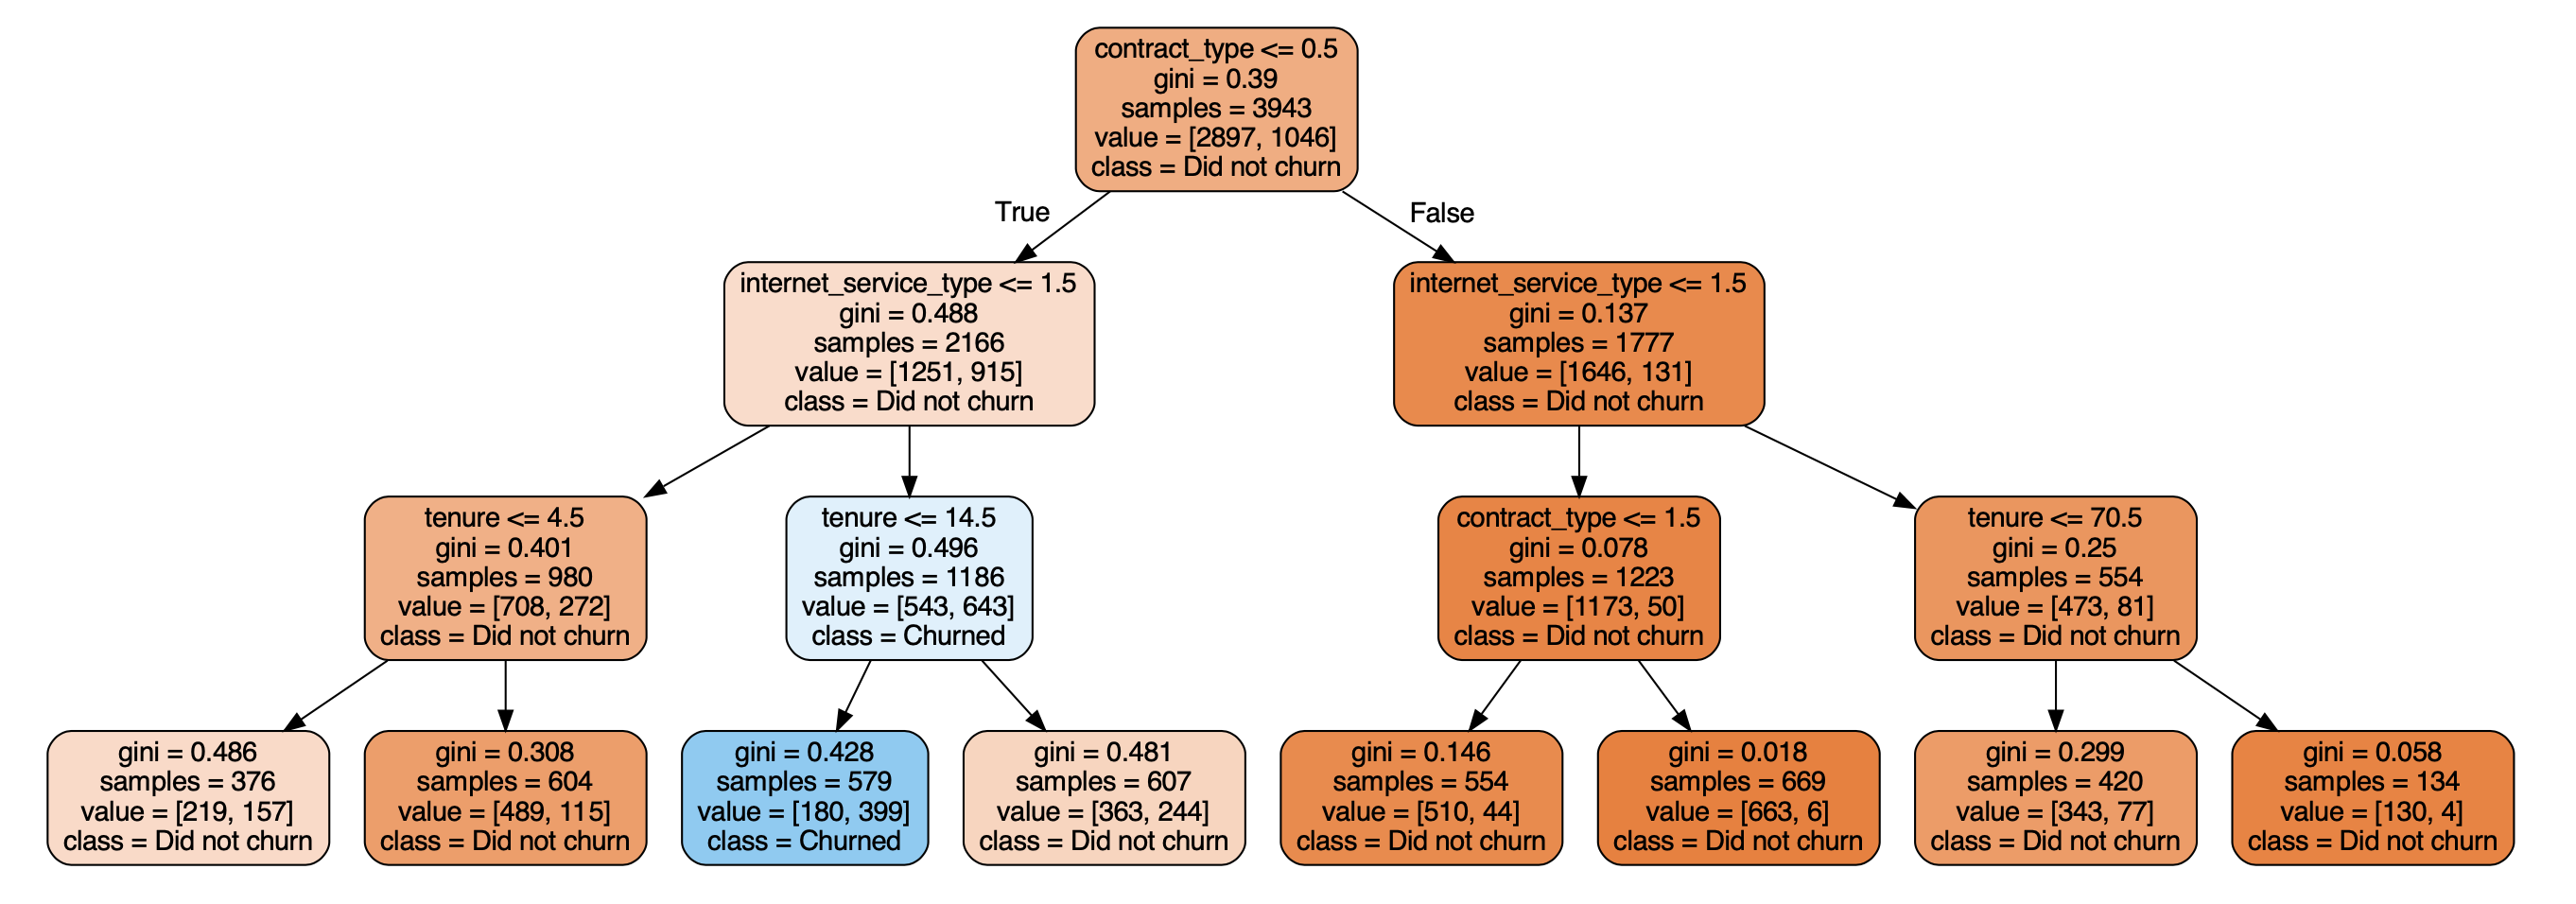

In [43]:
#create 2nd decision tree model (specifying max_depth argument and features)
dt2 = DecisionTreeClassifier(max_depth=5, random_state=123)

#specify the features we're using 
features = ["senior", "streaming_services", "contract_type", "add_ons"]

#fit model using only specified features
dt2.fit(X_train[features], y_train)

#since model was fit w/ subset of features, then need to .predict on that same subset of features
y_pred = dt2.predict(X_train[features])

#compare to 1st model
print('Accuracy of 1st Decision Tree classifier on training set: {:.2f}'
     .format(dt1.score(X_train, y_train)))
print("--------------------------------------------------------------")

print("2nd Model specifying senior, streaming services, contract type and add-ons features:")
print('Accuracy on training set: {:.2f}'
     .format(dt2.score(X_train[features], y_train)))

Accuracy of 1st Decision Tree classifier on training set: 0.79
--------------------------------------------------------------
2nd Model specifying senior, streaming services, contract type and add-ons features:
Accuracy on training set: 0.76


## Random Forest

In [44]:
#create 1st random forest model (specifying max_depth and min_samples_leaf parameters to avoid overfitting, all features)
rf1 = RandomForestClassifier(max_depth=5, min_samples_leaf=3, random_state=123)

#fit model
rf1 = rf1.fit(X_train, y_train)

#get predictions from model
y_pred = rf1.predict(X_train)

#compare to baseline
print("Baseline is", round(baseline_accuracy, 2))
print("----------------")
print("Model trained on all features:")
print('Accuracy of 1st Random Forest classifier on training set: {:.2f}'
     .format(rf1.score(X_train, y_train)))


Baseline is 0.73
----------------
Model trained on all features:
Accuracy of 1st Random Forest classifier on training set: 0.81


In [45]:
#create 2nd random forest model (specifying max_depth/min_samples_leaf argument and features)
rf2 = RandomForestClassifier(max_depth=5, min_samples_leaf=3, random_state=123)

#specify the features we're using 
features = ["senior", "streaming_services", "contract_type", "add_ons"]

#fit model using only specified features
rf2.fit(X_train[features], y_train)

#since model was fit w/ subset of features, then need to .predict on that same subset of features
y_pred = rf2.predict(X_train[features])

#compare to 1st model
print('Accuracy of 1st Random Forest classifier on training set: {:.2f}'
     .format(rf1.score(X_train, y_train)))
print("---------------------------------------------------------------")

print("2nd Model specifying senior, streaming services, contract type and add-ons features:")
print('Accuracy on training set: {:.2f}'
     .format(rf2.score(X_train[features], y_train)))

Accuracy of 1st Random Forest classifier on training set: 0.81
---------------------------------------------------------------
2nd Model specifying senior, streaming services, contract type and add-ons features:
Accuracy on training set: 0.76


## K-Nearest Neighbor (KNN)

In [46]:
#create 1st knn model (default parameters, all features)
knn1 = KNeighborsClassifier(n_neighbors=20)

#fit model
knn1 = knn1.fit(X_train, y_train)

#get predictions from model
y_pred = knn1.predict(X_train)

#compare to baseline
print("Baseline is", round(baseline_accuracy, 2))
print("----------------")
print("Model trained on all features:")
print('Accuracy of 1st KNN classifier on training set: {:.2f}'
     .format(knn1.score(X_train, y_train)))


Baseline is 0.73
----------------
Model trained on all features:
Accuracy of 1st KNN classifier on training set: 0.79


In [47]:
#create 2nd knn model (specifying n_neighbors argument and features)
knn2 = KNeighborsClassifier(n_neighbors=20)

#specify the features we're using 
features = ["senior", "streaming_services", "contract_type", "add_ons"]

#fit model using only specified features
knn2.fit(X_train[features], y_train)

#since model was fit w/ subset of features, then need to .predict on that same subset of features
y_pred = knn2.predict(X_train[features])

#compare to 1st model
print('Accuracy of 1st KNN classifier on training set: {:.2f}'
     .format(knn1.score(X_train, y_train)))
print("----------------------------------------------------")

print("2nd Model specifying senior, streaming services, contract type and add-ons features:")
print('Accuracy on training set: {:.2f}'
     .format(knn2.score(X_train[features], y_train)))

Accuracy of 1st KNN classifier on training set: 0.79
----------------------------------------------------
2nd Model specifying senior, streaming services, contract type and add-ons features:
Accuracy on training set: 0.76


## Logistic Regression

In [48]:
#create 1st logistic regression model (default parameters, all features)
logit1 = LogisticRegression(random_state=123)

#fit model
logit1.fit(X_train, y_train)

#get predictions from model
y_pred = logit1.predict(X_train)

#compare to baseline
print("Baseline is", round(baseline_accuracy, 2))
print("----------------")
print("Model trained on all features:")
print('Accuracy of 1st Logistic Regression classifier on training set: {:.2f}'
     .format(logit1.score(X_train, y_train)))

Baseline is 0.73
----------------
Model trained on all features:
Accuracy of 1st Logistic Regression classifier on training set: 0.80


In [49]:
#create 2nd logistic regression model (default parameters, specifying features)
logit2 = LogisticRegression(random_state=123)

#specify the features we're using 
features = ["senior", "streaming_services", "contract_type", "add_ons"]

#fit model using only specified features
logit2.fit(X_train[features], y_train)

#since model was fit w/ subset of features, then need to .predict on that same subset of features
y_pred = logit2.predict(X_train[features])

#compare to 1st model
print('Accuracy of 1st Logistic Regression classifier on training set: {:.2f}'
     .format(logit1.score(X_train, y_train)))
print("---------------------------------------------------------------")
print("2nd Model specifying senior, streaming services, contract type and add-ons features")
print('Accuracy on training set: {:.2f}'
     .format(logit2.score(X_train[features], y_train)))

Accuracy of 1st Logistic Regression classifier on training set: 0.80
---------------------------------------------------------------
2nd Model specifying senior, streaming services, contract type and add-ons features
Accuracy on training set: 0.75


### Findings:
- Can continue to create new models because each first classification model algorithm beats the baseline.
- There is a slight decrease on training data's accuracy from the 1st model (using all features) to the 2nd model (specifying certain features), but not by much.
- Specifying certain features can still be good predictors of target variable.

### Use train models to compare to validate dataset
- 2nd Decision Tree model
- 2nd K-Nearest Neighbor model
- 2nd Logistic Regression model

In [50]:
#dt2's metrics on validate

#specify the features we're using 
features = ["senior", "streaming_services", "contract_type", "add_ons"]

#evaluate on validate sample w/ specified features
y_pred = dt2.predict(X_validate[features])

#compare train to validate
print('Accuracy of 2nd Decision Tree classifier on training set: {:.2f}'
     .format(dt2.score(X_train[features], y_train)))
print("--------------------------------------------------------------")
print("Decision Tree classifier on validate set:")
print(classification_report(y_validate, y_pred))

Accuracy of 2nd Decision Tree classifier on training set: 0.76
--------------------------------------------------------------
Decision Tree classifier on validate set:
              precision    recall  f1-score   support

           0       0.79      0.92      0.85      1242
           1       0.59      0.31      0.40       449

    accuracy                           0.76      1691
   macro avg       0.69      0.61      0.63      1691
weighted avg       0.73      0.76      0.73      1691



In [51]:
#knn2's metrics on validate

#specify the features we're using 
features = ["senior", "streaming_services", "contract_type", "add_ons"]

#evaluate on validate sample w/ specified features
y_pred = knn2.predict(X_validate[features])

#compare train to validate
print('Accuracy of 2nd KNN classifier on training set: {:.2f}'
     .format(knn2.score(X_train[features], y_train)))
print("--------------------------------------------------------------")
print("KNN classifier on validate set:")
print(classification_report(y_validate, y_pred))

Accuracy of 2nd KNN classifier on training set: 0.76
--------------------------------------------------------------
KNN classifier on validate set:
              precision    recall  f1-score   support

           0       0.80      0.92      0.85      1242
           1       0.62      0.34      0.44       449

    accuracy                           0.77      1691
   macro avg       0.71      0.63      0.65      1691
weighted avg       0.75      0.77      0.74      1691



In [52]:
#logit2's metrics on validate

#specify the features we're using 
features = ["senior", "streaming_services", "contract_type", "add_ons"]

#evaluate on validate sample w/ specified features
y_pred = logit2.predict(X_validate[features])

#compare train to validate
print('Accuracy of 2nd Logistic Regression classifier on training set: {:.2f}'
     .format(logit2.score(X_train[features], y_train)))
print("--------------------------------------------------------------")
print("Logistic Regression classifier on validate set:")
print(classification_report(y_validate, y_pred))

Accuracy of 2nd Logistic Regression classifier on training set: 0.75
--------------------------------------------------------------
Logistic Regression classifier on validate set:
              precision    recall  f1-score   support

           0       0.78      0.95      0.85      1242
           1       0.62      0.25      0.35       449

    accuracy                           0.76      1691
   macro avg       0.70      0.60      0.60      1691
weighted avg       0.74      0.76      0.72      1691



### Findings:

- Models trained with specified features = "senior", "streaming_services", "contract_type", "add_ons"
    - `dt2` with max_depth=5
        - .76 accuracy on training data
        - .76 accuracy on out of sample data 
        - Accuracies remained the same
    - `knn2` with n_neighbors=20
        - .76 accuracy on training data
        - .77 accuracy on out of sample data 
        - Accuracy on validate data went up 1 point
    - `logit2` with default parameters
        - .75 accuracy on training data
        - .76 accuracy on out of sample data 
        - Accuracy on validate data went up 1 point 
- Considering the precision and recall values for the models, it looks like `knn2` model might be useful to test it.
- Can experiment w/ more hyperparameter values and combinations, but for the sake of time, we'll move on with the best model from the validation performance and evaluate it on the test dataset.

### Test best/final model

In [53]:
#specify the features we're using 
features = ["senior", "streaming_services", "contract_type", "add_ons"]

#evaluate on test sample w/ specified features
y_pred_test = knn2.predict(X_test[features])

print("KNN2 Model:")
print(classification_report(y_test, y_pred_test))

KNN2 Model:
              precision    recall  f1-score   support

           0       0.80      0.92      0.86      1035
           1       0.63      0.35      0.45       374

    accuracy                           0.77      1409
   macro avg       0.71      0.64      0.65      1409
weighted avg       0.75      0.77      0.75      1409



### Findings
On `knn2` model specifying parameter (n_neighbors=20) and features ("senior", "streaming_services", "contract_type", "add_ons")
- .76 accuracy on training data
- .77 accuracy on validate data
- .77 accuracy on test data
- All other scores remained the same/slightly increased 
- The model may be used to predict churn

# Generate CSV file
- Create a predictions dataframe to display the probability of churn 
- Apply appropriate column names for readability
- Add the customer_id from the original dataframe to the new predictions dataframe
- Convert to a csv file

In [54]:
#get probabilities from test sample w/ specified features
probs = knn2.predict_proba(X_test[features])

#create a dataframe of the probabilities
predictions = pd.DataFrame(probs)

#add customer_id index
predictions.index = X_test.index

#rename columns
predictions.columns=["probability_no_churn", "probability_churn"]

#create a new column w/ predictions from test data
predictions["predict_churn"] = y_pred_test

#take a look at dataframe of customer_id, probability of churn, and prediction of churn
predictions.head()

,probability_no_churn,probability_churn,predict_churn
customer_id,,,
3420-YJLQT,0.70,0.30,0
6543-JXSOO,0.80,0.20,0
5577-OTWWW,0.55,0.45,0
6646-JPPHA,0.55,0.45,0
5759-RCVCB,0.45,0.55,1


In [55]:
#convert dataframe to a csv
predictions.to_csv("predictions.csv")

## Conclusion
- K-Nearest Neighbor model with specified parameters (n_neighbors = 20) and specified features (senior, streaming_services, contract_type, add_ons) beat the baseline by 4%.
    - 76% accuracy on training data
    - 77% accuracy on validate data
    - 77% accuracy on test data
- This model based on the parameters and features specified is able to correctly predict 77% of customers who actually churn.
- It should be used to come up with ways to improve contract types, add ons and/or appeal more to seniors, people with streaming services.
- CSV file with predictions and probability of customer churn can be found [here](https://github.com/aliciag92/classification-project/blob/main/predictions.csv).